In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

color_palette = ['#fcfdbf', '#3b0f70', '#000004']

In [35]:
df = pd.read_csv('customer_dataset.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,10,0.00,1,1,0,78800.890983,1,1,1,DIAMOND,937.856785
1,2,15647311,Hill,608,Spain,Female,41,5,83807.86,1,0,1,158028.418692,0,1,4,DIAMOND,688.714393
2,3,15619304,Onio,502,France,Female,42,2,159660.80,3,1,0,59093.415704,1,1,1,DIAMOND,668.528860
3,4,15701354,Boni,699,France,Female,39,9,0.00,2,0,0,133175.002624,0,0,5,GOLD,944.974853
4,5,15737888,Mitchell,850,Spain,Female,43,4,125510.82,1,1,1,93270.327728,0,1,3,GOLD,108.192250
5,6,15574012,Chu,645,Spain,Male,44,9,113755.78,2,1,1,115158.822007,0,0,3,DIAMOND,552.984593
6,7,15592531,Bartlett,822,France,Male,50,9,0.00,2,1,1,147950.678252,0,0,3,SILVER,259.177001
7,8,15656148,Obinna,376,Germany,Female,29,10,115046.74,4,1,1,130827.204548,0,0,2,DIAMOND,286.692505
8,9,15792365,He,501,France,Male,44,8,142051.07,2,0,0,200487.559088,0,0,3,GOLD,458.747559
9,10,15592389,H?,684,France,Male,27,10,134603.88,1,1,1,237621.052911,0,0,5,GOLD,661.667244


In [36]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography'], inplace=True)

In [37]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.5,96.7,350.0,584.0,652.0,718.0,850.0
Age,10000.0,38.9,10.5,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.9,2.7,0.0,4.0,6.0,8.0,10.0
Balance,10000.0,70832.4,63261.0,0.0,0.0,89687.4,125488.3,250898.1
NumOfProducts,10000.0,1.5,0.6,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,107374.2,55348.0,4.9,65730.6,104778.4,144962.9,327862.0
Exited,10000.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
Complain,10000.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


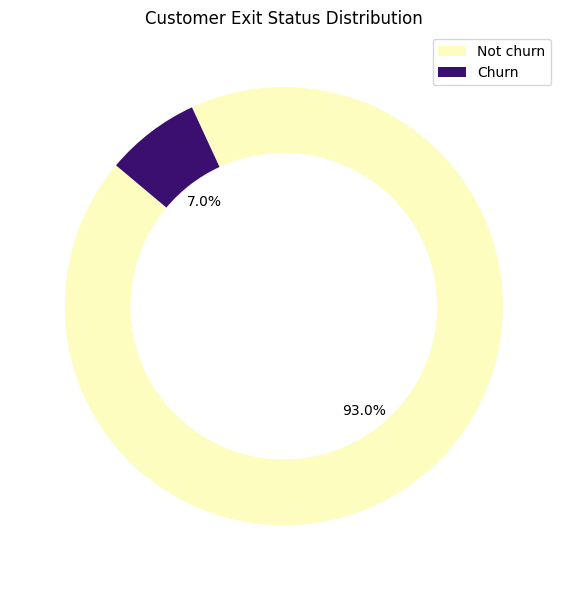

In [38]:
exit_status = df['Exited'].value_counts()
exit_labels = ['Not churn', 'Churn']

plt.figure(figsize=(12, 6))
plt.pie(exit_status, autopct='%1.1f%%', colors=color_palette, startangle=140, wedgeprops=dict(width=0.3), )
plt.legend(labels=exit_labels)
plt.title('Customer Exit Status Distribution')

plt.tight_layout()
plt.show()

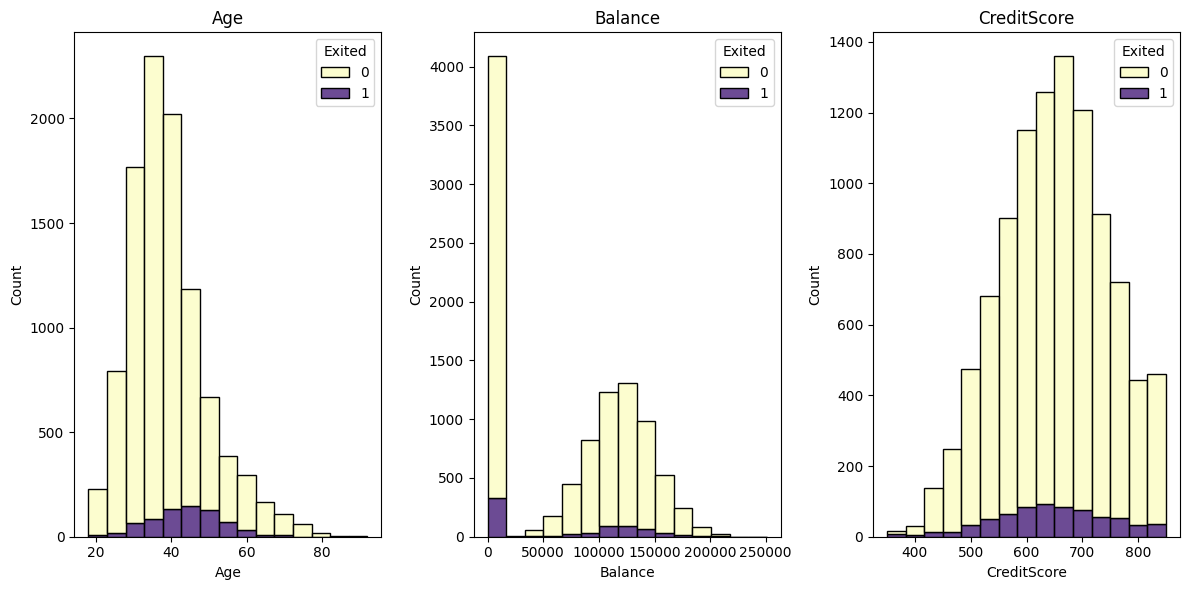

In [39]:
distributions = ['Age', 'Balance', 'CreditScore']  
titles = ['Age', 'Balance', 'CreditScore']

fig, axes = plt.subplots(1, 3, figsize=(12, 6))  

for i, ax in enumerate(axes):
    sns.histplot(data=df, x=distributions[i], hue='Exited', multiple='stack', 
                 palette=color_palette, edgecolor='black', bins=15, ax=ax)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()


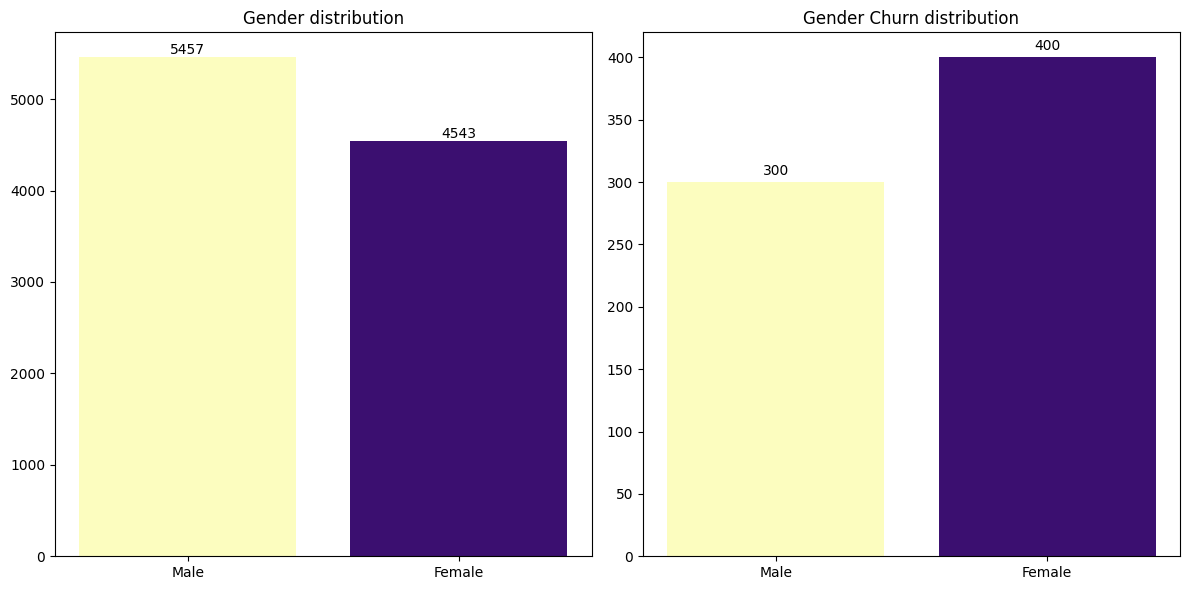

In [41]:
x = df['Gender'].value_counts().index
y = df['Gender'].value_counts().values

Male_churn = df[(df['Gender'] == 'Male') & (df['Exited'] == 1)].shape[0]
Female_churn = df[(df['Gender'] == 'Female') & (df['Exited'] == 1)].shape[0]
churn_values = [Male_churn, Female_churn]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.bar(x, y, color=color_palette)
ax1.set_title('Gender distribution')
ax1.bar_label(ax1.bar(x, y, color=color_palette), labels=[f'{int(value)}' for value in y])

ax2.bar(x, churn_values,color=color_palette )
ax2.set_title('Gender Churn distribution')
ax2.bar_label(ax2.bar(x, churn_values,color=color_palette ), labels=[f'{int(value)}' for value in churn_values], padding=3)

plt.tight_layout()
plt.show()

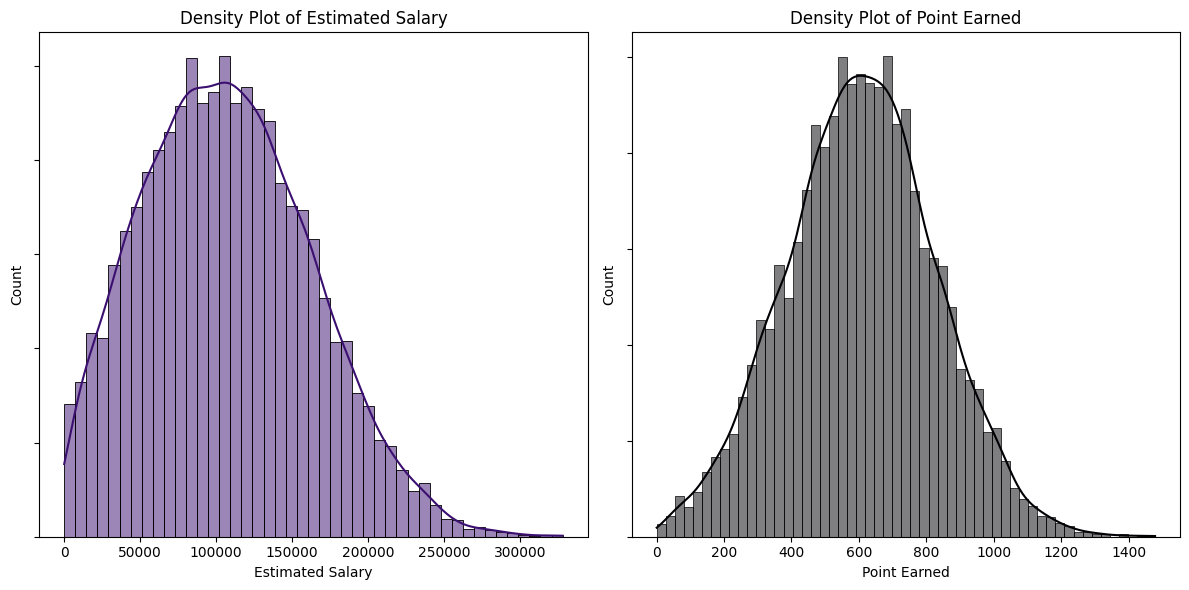

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['EstimatedSalary'], color='#3b0f70', ax=axes[0], kde=True)
axes[0].set_title('Density Plot of Estimated Salary')
axes[0].set_xlabel('Estimated Salary')
axes[0].set_yticklabels([])


sns.histplot(df['Point Earned'], color='#000004', ax=axes[1], kde=True)
axes[1].set_title('Density Plot of Point Earned')
axes[1].set_xlabel('Point Earned')
axes[1].set_yticklabels([])

plt.tight_layout()
plt.show()



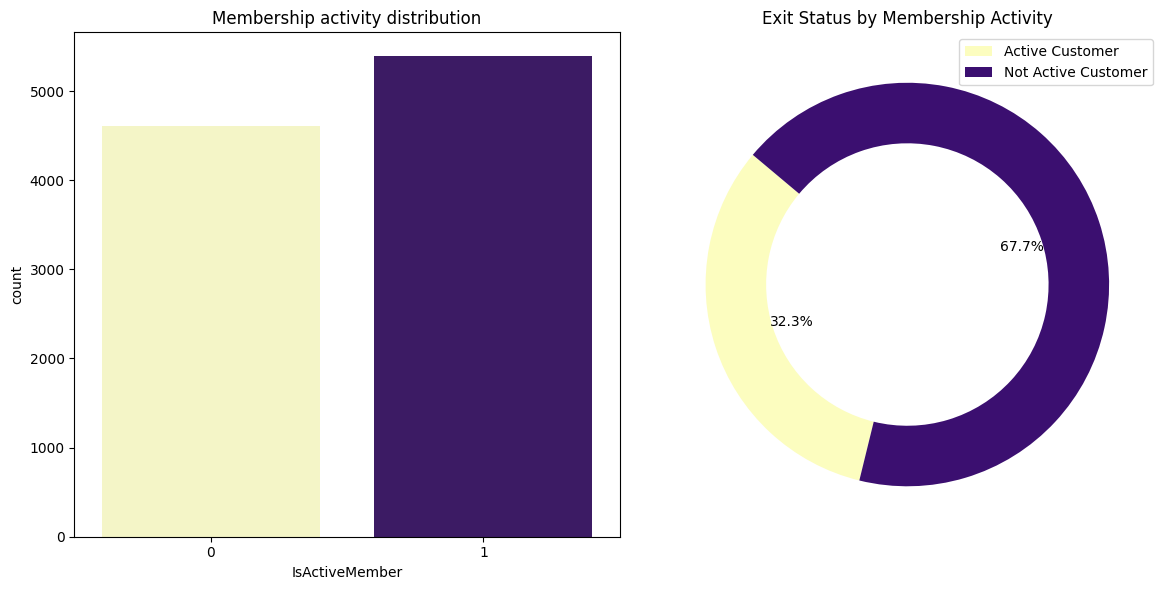

In [43]:
active_exited = df[(df['IsActiveMember'] == 1) & (df['Exited'] == 1)].shape[0]
not_active_exited = df[(df['IsActiveMember'] == 0) & (df['Exited'] == 1)].shape[0]
churn_data = [active_exited, not_active_exited]
churn_labels = ['Active Customer', 'Not Active Customer']

fig, axes = plt.subplots(1,2, figsize = (12,6))

sns.countplot(data=df, x=df.IsActiveMember, palette=color_palette, ax=axes[0])
axes[0].set_title('Membership activity distribution')

axes[1].pie(churn_data, autopct='%1.1f%%', colors=color_palette, startangle=140, wedgeprops=dict(width=0.3))
axes[1].legend(labels=churn_labels, loc='best')
axes[1].set_title('Exit Status by Membership Activity')


plt.tight_layout()
plt.show()

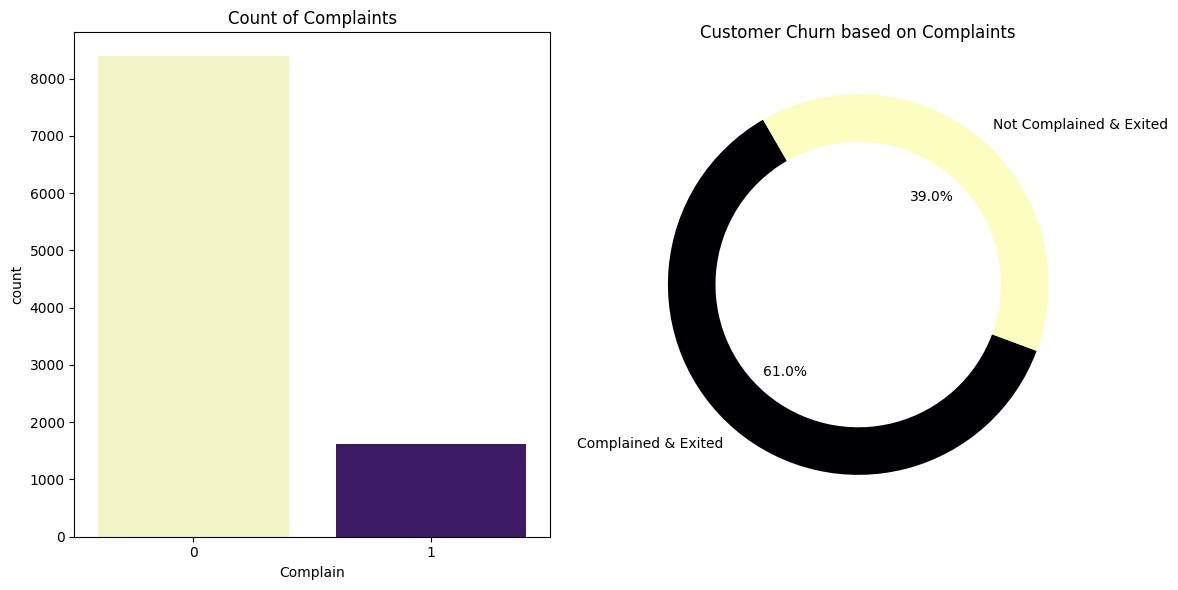

In [44]:
complained = df[(df['Complain'] == 1) & (df['Exited'] == 1)].shape[0]
not_complained = df[(df['Complain'] == 0) & (df['Exited'] == 1)].shape[0]
complaints = [complained, not_complained]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
sns.countplot(data=df, x='Complain', ax=ax1, palette=color_palette)
ax1.set_title('Count of Complaints')

ax2.pie(complaints, autopct='%1.1f%%', labels=['Complained & Exited', 'Not Complained & Exited'], colors=['#000004','#fcfdbf'], startangle=120, wedgeprops=dict(width=0.25))
ax2.set_title('Customer Churn based on Complaints')

plt.tight_layout()

plt.show()

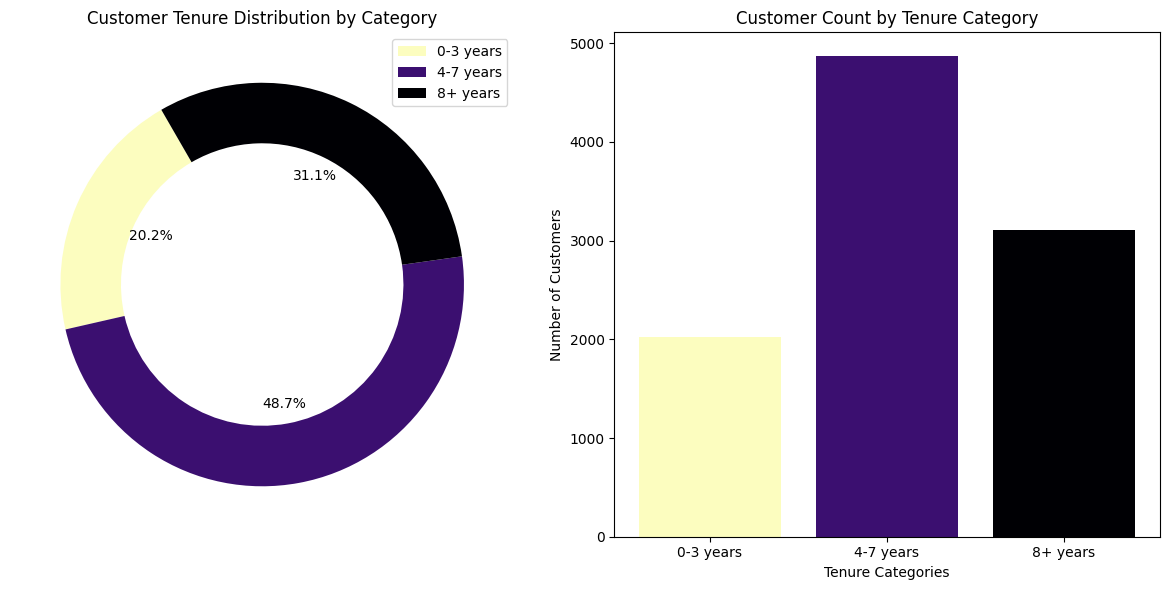

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

df['Tenure_Group'] = pd.cut(df['Tenure'], bins=[-1, 3, 7, df['Tenure'].max()], labels=['0-3 years', '4-7 years', '8+ years'])

tenure_counts = df['Tenure_Group'].value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))  

ax[0].pie(tenure_counts, autopct='%1.1f%%', colors=color_palette, startangle=120, wedgeprops=dict(width=0.3))
ax[0].legend(labels=['0-3 years', '4-7 years', '8+ years'], loc='best')
ax[0].set_title('Customer Tenure Distribution by Category')


ax[1].bar(['0-3 years', '4-7 years', '8+ years'], tenure_counts, color=color_palette)
ax[1].set_xlabel('Tenure Categories')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Customer Count by Tenure Category')

plt.tight_layout()
plt.show()



In [46]:

df['Tenure_Group'] = pd.cut(df['Tenure'], bins=[-1, 3, 7, df['Tenure'].max()], labels=['Early Churn', 'Mid Churn ', 'Long Churn'])

churn_by_tenure = df[df['Exited'] == 1].groupby('Tenure_Group').size()

churn_by_tenure


Tenure_Group
Early Churn    206
Mid Churn      392
Long Churn     102
dtype: int64

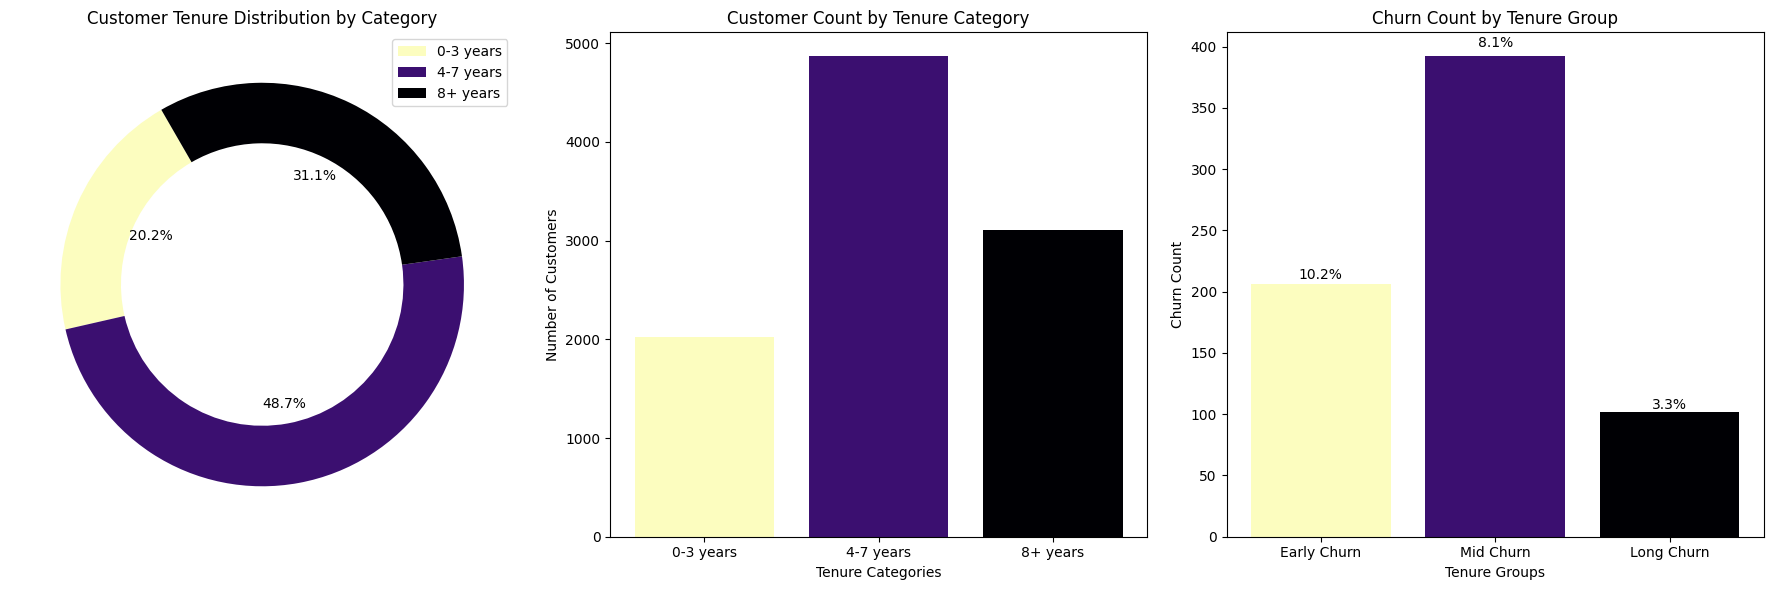

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Criar grupos de tenure (para os gráficos 1 e 2)
df['Tenure_Group'] = pd.cut(
    df['Tenure'],
    bins=[-1, 3, 7, df['Tenure'].max()],
    labels=['0-3 years', '4-7 years', '8+ years']
)

tenure_counts = df['Tenure_Group'].value_counts().sort_index()

# Criar figura com 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# ----------------------------------------------
# GRÁFICO 1 — Pizza da distribuição de tenure
# ----------------------------------------------
ax[0].pie(
    tenure_counts,
    autopct='%1.1f%%',
    colors=color_palette,
    startangle=120,
    wedgeprops=dict(width=0.3)
)
ax[0].legend(labels=['0-3 years', '4-7 years', '8+ years'], loc='best')
ax[0].set_title('Customer Tenure Distribution by Category')


ax[1].bar(['0-3 years', '4-7 years', '8+ years'], tenure_counts, color=color_palette)
ax[1].set_xlabel('Tenure Categories')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Customer Count by Tenure Category')


df['Tenure_Group_Churn'] = pd.cut(
    df['Tenure'],
    bins=[-1, 3, 7, df['Tenure'].max()],
    labels=['Early Churn', 'Mid Churn', 'Long Churn']
)

churn_counts = df[df['Exited'] == 1].groupby('Tenure_Group_Churn').size()

group_totals = df.groupby('Tenure_Group_Churn').size()

churn_pct = (churn_counts / group_totals * 100).fillna(0)

ax[2].bar(churn_counts.index, churn_counts.values, color=color_palette)
ax[2].set_ylabel('Churn Count')
ax[2].set_xlabel('Tenure Groups')
ax[2].set_title('Churn Count by Tenure Group')

for i, (count, pct) in enumerate(zip(churn_counts.values, churn_pct.values)):
    ax[2].text(i, count + (count * 0.02) , f"{pct:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['Card Type'] = encoder.fit_transform(df['Card Type'])
df['Tenure_Group'] = encoder.fit_transform(df['Tenure_Group'])
df['Tenure_Group_Churn'] = encoder.fit_transform(df['Tenure_Group_Churn'])

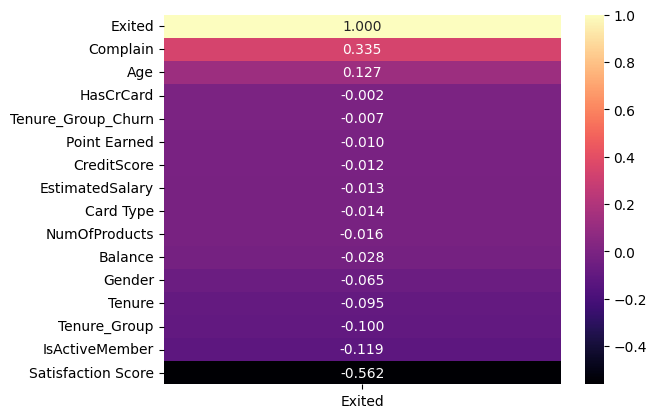

In [49]:
correlation_matrix = df.corr()[['Exited']].sort_values(by='Exited', ascending=False)
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.3f')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10, random_state=0)
random_forest.fit(X_train,y_train)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

random_forest = RandomForestClassifier(n_estimators=10, random_state=0)
random_forest.fit(X_train, y_train)


pred_proba = random_forest.predict_proba(X_test)[:, 1]

threshold = 0.35


y_pred = (pred_proba > threshold).astype(int)


print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, pred_proba))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1860
           1       0.88      0.96      0.92       140

    accuracy                           0.99      2000
   macro avg       0.94      0.98      0.96      2000
weighted avg       0.99      0.99      0.99      2000

ROC-AUC: 0.9971178955453148


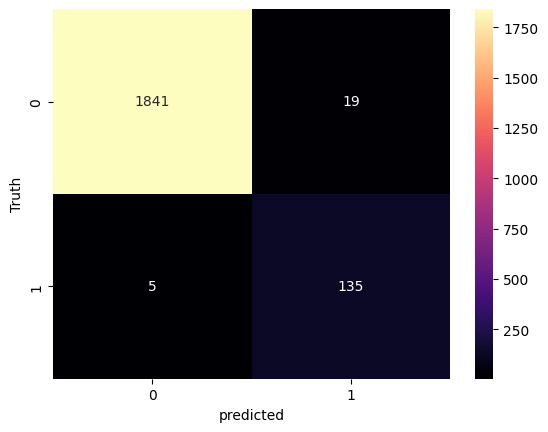

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='magma', fmt = "d")
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

Se a probabilidade de churn passar de X%, eu quero marcar como churn.hreshold 0.50 é só um default arbitrário, nunca é o ideal.Se cada cliente churn gera grande prejuízo, então vale a pena aumentar recall mesmo com muitos FP. Isso depende totalmente do negócio, quão conservador você quer que seja.
